In [18]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

## Read data from multiple folders / simulation runs

In [18]:
folder_path = '../../CCUS/data/GlobalSA_exp1/'

dfexp = pd.read_csv(os.path.join(folder_path, 'exp_design_runall_sample1.csv'))
allnpynames = os.listdir(os.path.join(folder_path, 'simfiles_runall_sample1', 'rst_npy'))
caseid = np.sort([int(x.split('_')[0][4:]) for x in allnpynames])
dfexpX = dfexp[dfexp['caseid'].isin(caseid)]

dfexplhs = pd.read_csv(os.path.join(folder_path, 'exp_design_LHS205.csv'))
lhsnpynames = os.listdir(os.path.join(folder_path, 'simfiles_LHS205', 'rst_npy'))
lhscaseid = np.sort([int(x.split('_')[0][4:]) for x in lhsnpynames])
lhsdfexpX = dfexplhs[dfexplhs['caseid'].isin(lhscaseid)]

## Merge all simulation runs together

In [33]:
dfall = pd.concat([dfexpX, lhsdfexpX])
caseid = [int(ii+1) for ii in range(dfall.shape[0])]
tag = ['runall_sample1']*dfexpX.shape[0] + ['LHS205']*lhsdfexpX.shape[0]
dfall = dfall.rename(columns={'caseid': 'raw_caseid'})
dfall.insert(0, "tag", tag)
dfall.insert(0, "caseid", caseid)

Save dfall to csv

In [35]:
# dfall.to_csv(os.path.join(folder_path, 'DGSA_exp1.csv'), index=False)

## Read all samples in npy format

- Pad 0 for variable time length data

In [131]:
max_inj_hrzn = dfall['inj_hrzn, year'].max()
num_samples = dfall.shape[0]
rst_npy = np.zeros((num_samples, 33, 33, max_inj_hrzn))

# Data 1: runall_sample1 data
for i, idx in enumerate(dfall[dfall['tag'] == 'runall_sample1']['raw_caseid'].tolist()):
    npy_temp = np.load(os.path.join(folder_path, 'simfiles_runall_sample1', 'rst_npy', f'case{idx}_VERDSPLGEO.npy'))
    time_dim = npy_temp.shape[-1]
    rst_npy[i,:,:,:int(time_dim-3)] = npy_temp[:,:,0,1:-2]

# Data 2: LHS205 data
for j, idx in enumerate(dfall[dfall['tag'] == 'LHS205']['raw_caseid'].tolist()):
    npy_idx = int(j + dfall[dfall['tag'] == 'runall_sample1'].shape[0])
    npy_temp = np.load(os.path.join(folder_path, 'simfiles_LHS205', 'rst_npy', f'case{idx}_VERDSPLGEO.npy'))
    time_dim = npy_temp.shape[-1]
    rst_npy[npy_idx,:,:,:int(time_dim-3)] = npy_temp[:,:,0,1:-2]

In [132]:
rst_npy.shape

(196, 33, 33, 30)

Save rst_npy for dimension reduction

In [133]:
# np.save(os.path.join(folder_path, 'DGSA_exp1.npy'), rst_npy)

## Load from exisiting files

In [2]:
folder_path = '../../CCUS/data/GlobalSA_exp1/'

load_dfall = pd.read_csv(os.path.join(folder_path, 'DGSA_exp1.csv'))
load_rst_npy = np.load(os.path.join(folder_path, 'DGSA_exp1.npy'))

dfall = load_dfall
rst_npy = load_rst_npy

load_rst_npy.shape

(196, 33, 33, 30)

In [28]:
dfall

,caseid,tag,raw_caseid,caseid_runall,"E_shale, psi","E_sand, psi",v_shale,v_sand,kvkh,"inj_rate, ft3/day","inj_hrzn, year",term_status
0,1,runall_sample1,1,73.0,4740000.00,2760000.00,0.287,0.137,0.100,3.680833e+07,10,0
1,2,runall_sample1,2,556.0,11700000.00,2760000.00,0.287,0.272,0.500,1.051667e+08,10,0
2,3,runall_sample1,3,852.0,11700000.00,8310000.00,0.287,0.272,1.000,7.098750e+07,30,1
3,4,runall_sample1,4,784.0,11700000.00,8310000.00,0.255,0.272,2.000,3.680833e+07,10,0
4,5,runall_sample1,5,366.0,8220000.00,5535000.00,0.287,0.137,0.100,7.098750e+07,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,LHS205,190,NaN,11503431.60,3878265.04,0.266,0.228,0.533,4.739659e+07,16,0
192,193,LHS205,191,NaN,7245976.62,3846273.48,0.269,0.158,0.890,6.306762e+07,16,0
193,194,LHS205,201,NaN,10122716.13,7687501.54,0.277,0.215,0.489,3.933247e+07,18,0
194,195,LHS205,204,NaN,6547649.78,4070065.50,0.256,0.256,1.479,6.601529e+07,24,0


## Visualization 

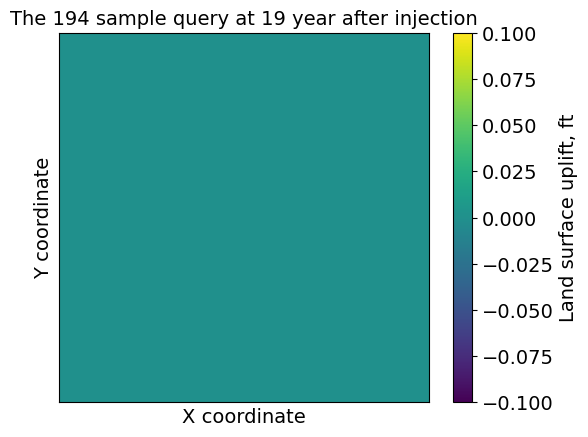

In [40]:
sample_idx = 194
time_idx = 19

fig, ax = plt.subplots()
plt.imshow(rst_npy[int(sample_idx-1),:,:,int(time_idx-1)])
plt.xlabel('X coordinate', fontsize=14)
plt.ylabel('Y coordinate', fontsize=14)
plt.title(f'The {sample_idx} sample query at {time_idx} year after injection', fontsize=14)
cbar = plt.colorbar()
cbar.set_label("Land surface uplift, ft", fontsize=14)
cbar.ax.tick_params(labelsize=14) 
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.show()